# Tumor Prediction: Malignant or Benign

## Introduction
<b>Breast Cancer</b> is a common cancer among women. It is hard to diagnose this cancer before it is mature and widespread, so researches are now being done by analysing the data of patients collected and finding a pattern in them. Machine learning algorithms can help us diagnose cancer in early stages or even before the occurence and can save a lot of lives.

This project is related to classifying data of a tumour having different features into <b>benign</b> and <b>malignant</b>.


## About the dataset

This breast cancer dataset is taken from [UCI ML Repository](https://archive.ics.uci.edu/ml/datasets/breast+cancer+wisconsin+(original)

The dataset contains <b>11 columns</b> (features or attributes) and <b>700 rows</b> (participants in the survey). The attributes or features in the dataset are as follows:

* <b>Sample Code:</b> Unique ID of the patient (datatype - int)


* <b>Clump Thickness:</b> if cells are either mono-layered or multi-layered (datatype - int)


* <b>Uniformity of Cell Size:</b> Estimates the consistency in the size of cells (datatype - int)


* <b>Uniformity of Cell Shape:</b> Estimates the equality of cell shapes and identifies                                  marginal variances (datatype - int)


* <b>Marginal Adhesion:</b> Quantifies how much cells on the outside of the epithelial tend to stick together (datatype - int)


* <b>Single Epithelial Cell Size:</b> Relates to cell uniformity, determines if epithelial cells are significantly enlarged (datatype - int)


* <b>Bare Nuclei:</b> Calculates the proportion of the number of cells not surrounded by cytoplasm (datatype - string)


* <b>Bland Chromatin:</b> Rates the uniform "texture" of the nucleus in a range from fine to coarse (datatype - int)


* <b>Normal Nucleoli:</b> Determines whether the nucleoli are small and barely visible or larger, more visible, and more plentiful (datatype - int)


* <b>Mitoses:</b> Describes the level of mitotic (cell reproduction) activity (datatype - int)


* <b>Class:</b> 2 for benign,  4 for malignant (datatype - int)


## Dataset Preprocessing and Analysis

In [1]:
#importing necessary packages

from collections import Counter
import itertools
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import precision_recall_curve

from sklearn.model_selection import train_test_split

In [2]:
# Reading the dataset.
file = 'dataset2.xlsx'
df = pd.read_excel(file)

# No. of entries in the dataset ==> 700
print(len(df))

# Prints the data types of each attribute.
print(df.dtypes)

699
Sample code number                           int64
Clump Thickness                              int64
Uniformity of Cell Size                      int64
Uniformity of Cell Shape                     int64
Marginal Adhesion                            int64
Single Epithelial Cell Size                  int64
Bare Nuclei                                 object
Bland Chromatin                              int64
Normal Nucleoli                              int64
Mitoses                                      int64
Class: (2 for benign,  4 for malignant)      int64
 4 for malignant)                          float64
dtype: object


In [3]:
df.head()

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,"Class: (2 for benign, 4 for malignant)",4 for malignant)
0,1000025,5,1,1,1,2,1,3,1,1,2,NaN
1,1002945,5,4,4,5,7,10,3,2,1,2,NaN
2,1015425,3,1,1,1,2,2,3,1,1,2,NaN
3,1016277,6,8,8,1,3,4,3,7,1,2,NaN
4,1017023,4,1,1,3,2,1,3,1,1,2,NaN


<b>Observation 1:</b> The attribute '4 for malignant' contains all the <b>NaN</b> values which is irrrelevant. So, we're removing this irrelevant attribute.

In [4]:
# Dropping '4 for malignant' feature as it contains irrelevant 'NaN' values.
df = df.drop([' 4 for malignant)'], axis = 1)

<b>Observation 2:</b> The <b>Bare Nuclei</b> attribute contains <b>16 unknown enteries</b> as <b>'?'</b>. The following are the tuple numbers of these unknown values:

In [5]:
# Finding all the unknown enteries in the dataset.
print('No. of unknown enteries: ', len(df.index[df['Bare Nuclei'] == '?'].tolist()))

No. of unknown enteries:  16


In [6]:
# Finding index of all the unknown enteries for preprocessing.
s = df.index[df['Bare Nuclei'] == '?'].tolist()
print(s)

[23, 40, 139, 145, 158, 164, 235, 249, 275, 292, 294, 297, 315, 321, 411, 617]


In [7]:
# Replacing '?' to 0 just to make it integer. Later on, it'll be replaced via appropriate value. 
for i in s:
    df.loc[ i ,'Bare Nuclei'] = 0

In [8]:
df['Bare Nuclei'].value_counts()

1     402
10    132
5      30
2      30
3      28
8      21
4      19
0      16
9       9
7       8
6       4
Name: Bare Nuclei, dtype: int64

* In the above count values, '1' value of 'Bare Nuclei' has count of 402. So, we replace unknown '?' enteries with mode of the count values i.e. 402.

In [9]:
# Replacing unknown values with the mode of the attribute.  
p = df['Bare Nuclei'].mode()

for i in s:
    df.loc[i, 'Bare Nuclei'] = 1

In [10]:
df.columns

Index(['Sample code number', 'Clump Thickness', 'Uniformity of Cell Size',
       'Uniformity of Cell Shape', 'Marginal Adhesion',
       'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin',
       'Normal Nucleoli', 'Mitoses',
       'Class: (2 for benign,  4 for malignant)'],
      dtype='object')

In [11]:
# Checking missing values in the dataset.
total = df.isnull().sum().sort_values(ascending = False)
percent = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending = False)
missing_data  = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data

# The result shows that there are no missing values in the dataset as missing count is 0 in all cases.

,Total,Percent
"Class: (2 for benign, 4 for malignant)",0,0.0
Mitoses,0,0.0
Normal Nucleoli,0,0.0
Bland Chromatin,0,0.0
Bare Nuclei,0,0.0
Single Epithelial Cell Size,0,0.0
Marginal Adhesion,0,0.0
Uniformity of Cell Shape,0,0.0
Uniformity of Cell Size,0,0.0
Clump Thickness,0,0.0


## Normalizing the data points

This is the function for normalizing the values in the dataset.
Normalization is done using:

<b>(x - min_value) / (max_value - min_value)</b>

In [12]:
# Function for normalizing the values in the dataset.

def normalize(df):
    result = df.copy()
    for feature_name in df.columns:
        max_value = df[feature_name].max()
        min_value = df[feature_name].min()
        result[feature_name] = (df[feature_name] - min_value) / (max_value - min_value)
    return result

In [13]:
# Normalizing the dataset.
df = normalize(df)
df.head()

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,"Class: (2 for benign, 4 for malignant)"
0,0.070067,0.444444,0.000000,0.000000,0.000000,0.111111,0.000000,0.222222,0.000000,0.0,0.0
1,0.070285,0.444444,0.333333,0.333333,0.444444,0.666667,1.000000,0.222222,0.111111,0.0,0.0
2,0.071217,0.222222,0.000000,0.000000,0.000000,0.111111,0.111111,0.222222,0.000000,0.0,0.0
3,0.071281,0.555556,0.777778,0.777778,0.000000,0.222222,0.333333,0.222222,0.666667,0.0,0.0
4,0.071336,0.333333,0.000000,0.000000,0.222222,0.111111,0.000000,0.222222,0.000000,0.0,0.0


# Visualizations

## Correlation Analysis: Heatmap

To calculate the <b>associativity</b> among the attributes, we find correlation between all the pairs of attributes and finally, plot <b>Heatmap</b>. The light colored squares denote lesser correlation while dark colored squares denote higher correlation value.

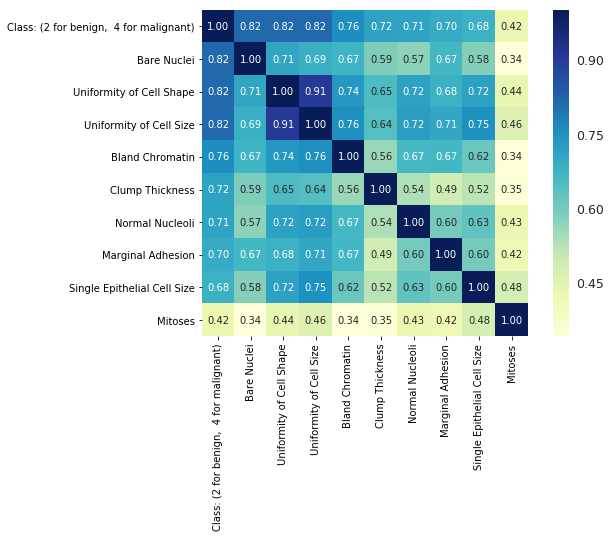

In [14]:
# Finding correlation among the pairs of attributes and plotting heatmap.

corrmat = df.corr()
f, ax = plt.subplots(figsize=(9, 6))
k = 10

selectedCols = corrmat.nlargest(k, 'Class: (2 for benign,  4 for malignant)')['Class: (2 for benign,  4 for malignant)'].index
cm = np.corrcoef(df[selectedCols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size' : 10}, cmap="YlGnBu", yticklabels=selectedCols.values, xticklabels=selectedCols.values)
plt.show()

In [15]:
y = df['Class: (2 for benign,  4 for malignant)']
X = df.drop(['Class: (2 for benign,  4 for malignant)' , 'Sample code number'], axis = 1)

## Count plot & Pie Chart

Using count plot and pie chart, it's clear that we have enough enteries for both the class labels. Hence, our model is no suffering from <b>Class Imbalance problem</b>.

Number of Benign:  458
Number of Malignant :  241


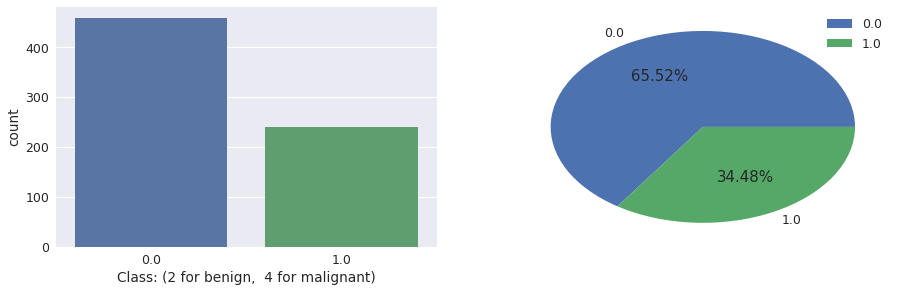

In [16]:
# Count plot: Showing the number of tuples belonging to each class label.

fig = plt.figure(figsize=(15,15))
B, M = y.value_counts()
print('Number of Benign: ',B)
print('Number of Malignant : ',M)
plt.subplot(321)
sns.countplot(y,label="Count")
plt.subplot(322)
plt.pie(y.value_counts(),labels=y.unique(), autopct ='%1.2f%%')
plt.legend(loc='best')
plt.show()

In [17]:
X.describe()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses
count,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,0.379749,0.237164,0.245271,0.200763,0.246225,0.276268,0.270863,0.207439,0.065490
std,0.312860,0.339051,0.330213,0.317264,0.246033,0.402437,0.270929,0.339293,0.190564
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.111111,0.000000,0.000000,0.000000,0.111111,0.000000,0.111111,0.000000,0.000000
50%,0.333333,0.000000,0.000000,0.000000,0.111111,0.000000,0.222222,0.000000,0.000000
75%,0.555556,0.444444,0.444444,0.333333,0.333333,0.444444,0.444444,0.333333,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Violin plot

Violin plot is a method of plotting numeric data. It is very similar to Box plot except that it also shows probability densities of data at different values.  

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), <a list of 9 Text xticklabel objects>)

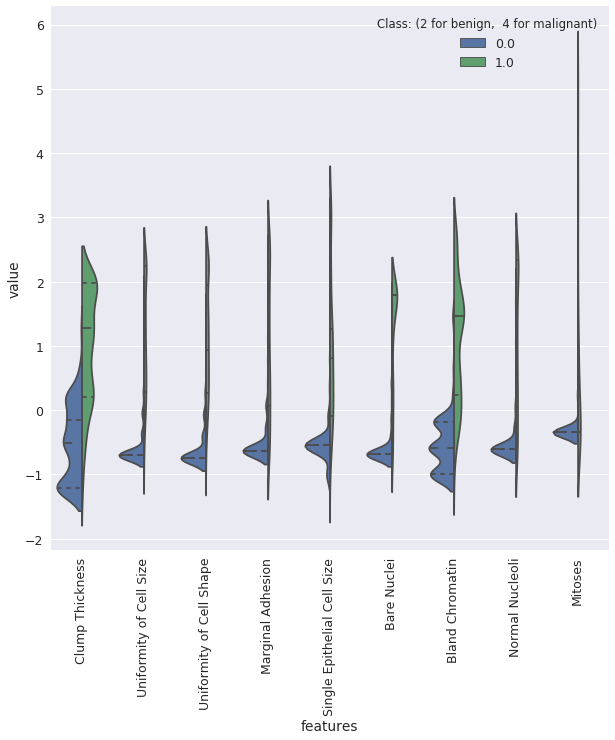

In [18]:
data_dia = y
data = X
data_n_2 = (data - data.mean()) / (data.std())              # standardization
data = pd.concat([y,data_n_2.iloc[:,0:9]],axis=1)
data = pd.melt(data,id_vars="Class: (2 for benign,  4 for malignant)",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10, 10))
sns.violinplot(x="features", y="value", hue="Class: (2 for benign,  4 for malignant)", data=data,split=True, inner="quart")
plt.xticks(rotation=90)

## Box plot

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text xticklabel objects>)

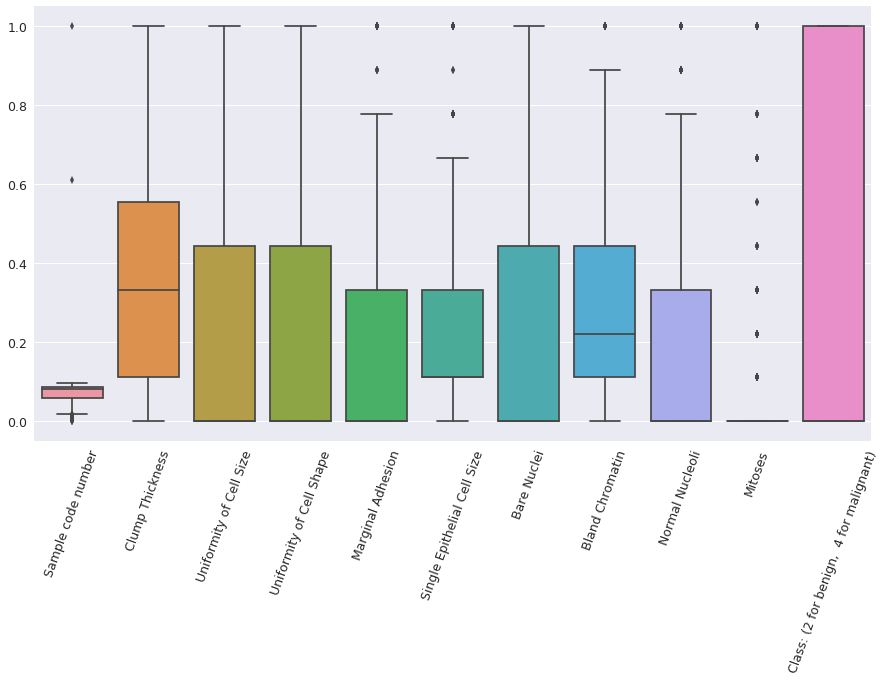

In [19]:
# Plotting Box Plot.
fig=plt.figure(figsize=(15,8))
sns.boxplot(data=df)
plt.xticks(rotation=70)

## Joint Plot

The Joint Plot below demonstrates that two features 'Uniformity of Cell Shape' and 'Uniformity of Cell Size' are highly correlated. So, we should select one out of them in our model.

/home/prashant/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/prashant/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


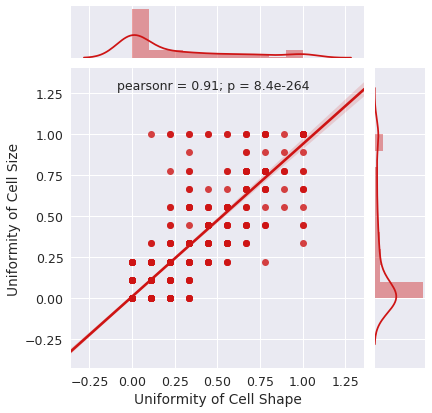

In [20]:
sns.jointplot(X.loc[:,'Uniformity of Cell Shape'], X.loc[:,'Uniformity of Cell Size'], kind="regg", color="#ce1414")

## Feature Selection

In [21]:
# Manually dropping feature- Uniformity of Cell based on Joint Plot.
X = X.drop(['Uniformity of Cell Size'], axis = 1)

We're using <b>SelectKBest</b> method for selecting best 5 (based on experimentation) features out of all the 10 features in the dataset. This method finds the Fitness Scores of all the features and then, selects the ones with the highest scores.

In [22]:
print(X.shape)

selector = SelectKBest(f_classif, k = 5)
X_new = selector.fit_transform(X, y)

print(X_new.shape)
names = X.columns.values[selector.get_support()]
scores = selector.scores_[selector.get_support()]
names_scores = list(zip(names, scores))
ns_df = pd.DataFrame(data = names_scores, columns=['Feat_names', 'F_Scores'])

#Sort the dataframe for better visualization
ns_df_sorted = ns_df.sort_values(['F_Scores', 'Feat_names'], ascending = [False, True])
print(ns_df_sorted)

(699, 8)
(699, 5)
                 Feat_names     F_Scores
2               Bare Nuclei  1419.665512
1  Uniformity of Cell Shape  1419.305530
3           Bland Chromatin   933.287297
0           Clump Thickness   733.206978
4           Normal Nucleoli   717.628041


# ML model

We now shuffle and then, divide the dataset into train and test sets for our Machine Learning model.
* <b>Train set</b> contains 70% of the records.
* <b>Test set</b> contains 30% of the records.

In [23]:
# Dividing dataset into train and test set after shuffling all the records.
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.3, random_state=42)

Random Forest is an ensemble based model that fits a number of independent decision tree classifiers on various sub-samples of the datasets. It's a bagging based ensemble model.

Applying <b>Random Forest</b> ensemble model for classification.

In [24]:
# Applying random Forest Classification model.
clf_rf = RandomForestClassifier(n_estimators=10)    # n_estimators is the number of Decision Trees used.

# Training the model using training test.
clr_rf = clf_rf.fit(X_train,y_train)

# Predicting the testing set.
pred_rf = clf_rf.predict(X_test)

## Feature Importance

We are now doing analysis of- how each and every selected feature is contributing towards prediction in the model.

From the below graph, we can find that 'Marginal Adhesion' is contributing the most towards the accurate prediction of the model.

Feature ranking:
1. feature 1 (0.368949)
2. feature 2 (0.346135)
3. feature 3 (0.117191)
4. feature 4 (0.112340)
5. feature 0 (0.055385)


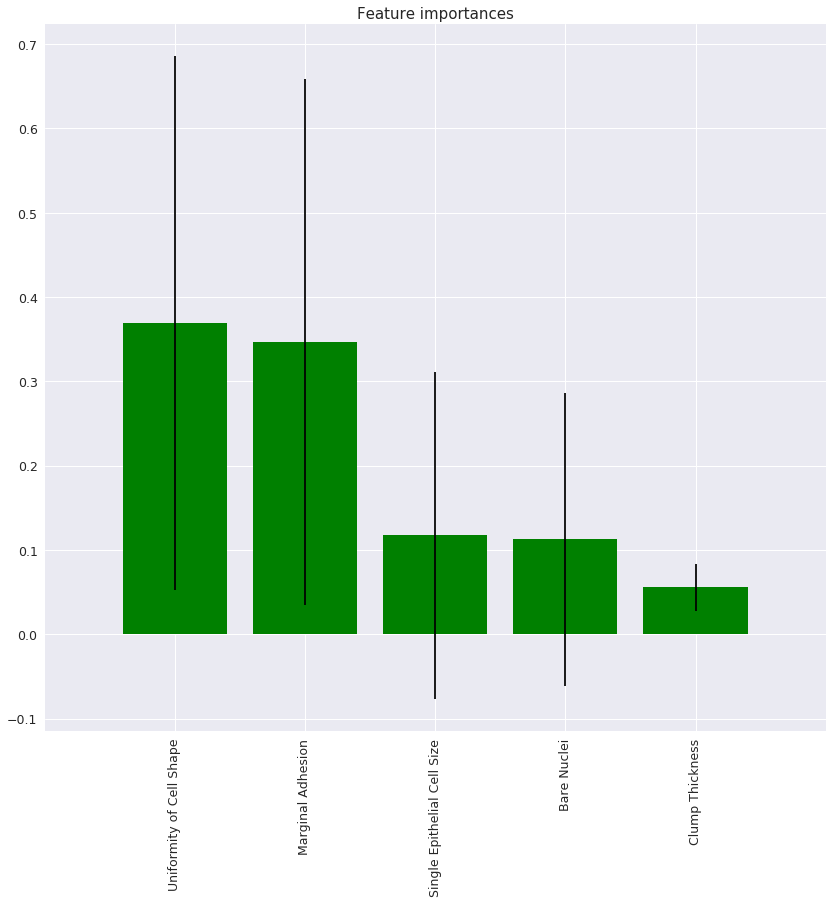

In [25]:
importances = clr_rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf_rf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest

plt.figure(1, figsize=(14, 13))
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices],
       color="g", yerr=std[indices], align="center")
plt.xticks(range(X_train.shape[1]), X.columns[indices],rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.show()

## Model Evaluation

In [26]:
# Accuracy score
acc_rf = accuracy_score(y_test, pred_rf)
acc_rf

0.9428571428571428

In [27]:
# Precision score
pre_rf = precision_score(y_test, pred_rf, average="macro")
pre_rf

0.9452084937836945

In [28]:
# Recall score
rec_rf = recall_score(y_test, pred_rf, average="macro")
rec_rf

0.9223463104060119

In [29]:
# F1 score
f1_rf = f1_score(y_test, pred_rf, average="macro")
f1_rf

0.9325770547945205

## Confusion Matrix

In [30]:
classes1 = {2: 'B', 4: 'M'}
com_rf= confusion_matrix(y_test, pred_rf)

In [31]:
# Function for plotting Confusion matrix
def plotConfusionMatrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Reds):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

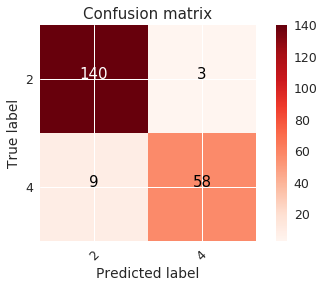

In [32]:
# Plotting confusion matrix.
plotConfusionMatrix(com_rf, classes1)

This is a Confusion matrix.

True Positive: 140

False Positive: 3

True Negative: 64

False Negative: 3